In [1]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import pickle
import math
from scipy.fftpack import dct, idct
import wave
from scipy import fromstring, int16
from matplotlib import pyplot as plt
from scipy.io import wavfile
import mdct
from cmf.crmf import CRMF
%matplotlib inline

In [2]:
wav_name = "D:/ash_dat/cg/wav2/tulip.wav"
output_name = "D:/ash_dat/cg/wav3/tulip_compressed.wav"

# WAVファイルを開く
fs, raw_wav = wavfile.read(wav_name, "rb")
wav = np.array(raw_wav.T[0, :])

In [3]:
# slide_width = 256
# framelength = 2 * slide_width
# spec = mdct.mdct(wav, framelength=framelength).T
# with open('tulip_spec_train.pickle', mode='wb') as f:
#     pickle.dump(spec, f)

In [4]:
with open('tulip_spec_train.pickle', mode='rb') as f:
    spec = pickle.load(f)

In [5]:
X = spec[:10000, :]
arg_dict = dict(
    convolution_max = 10,
#     component_max = X.shape[1],
    true_width = 1,
    true_n_components = 50,
    activation_l1_weight = 0.0,
    activation_l2_weight = 1.0,
    base_max = 10.0,
    convergence_threshold = 0.0001,
    loop_max = 1,
    fit_accelerator_max = 0.2,
    transfer_accelerator_max = 0.0,
    print_flag = 1)
factorizer = CRMF(**arg_dict)
filtre = np.ones(X.shape)
# loss_weight = 0.1 ** (np.arange(X.shape[1]) / 100.0)
loss_weight = 1.0 * np.ones(X.shape[1])
base_l2_weight = 1.0 * np.ones(X.shape[1])
base_l1_weight = np.zeros(X.shape[1])
# factorizer.fit(X, None, filtre=filtre)
factorizer.fit(X, None, filtre=filtre, loss_weight = loss_weight, base_l1_weight = base_l1_weight, base_l2_weight = base_l2_weight)


loop_idx 0 accelerator 1.0 elapsed_time 0.5000627040863037 joint_loss 230686796443201.53
loop_idx 0 accelerator 1.0 elapsed_time 0.8039963245391846 joint_loss 125625652631264.22


In [6]:
# compressed_spec = np.zeros(spec.shape)
# compressed_spec[:32, :] = spec[:32, :]
# compressed_spec[:, 8400:] = spec[:, 8400:]
# compressed = mdct.imdct(compressed_spec, framelength=framelength)
# wavfile.write(output_name, fs, compressed.astype(np.int16))

In [7]:
# plt.figure(figsize=(40, 40))
# plt.imshow(spec[:128, 0:400], interpolation='nearest', cmap=plt.get_cmap('bwr'))
# plt.plot(wav[:100000])
# plt.plot(compressed[:100000])

In [8]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [9]:
freq_lim = 64
W = spec[11000:12000, :]
# W[:, freq_lim:] = 0
F = np.zeros(W.shape)
F[:, :freq_lim] = 1

In [10]:
factorizer.transfer(W, transfer_filtre=F)

loop_idx 0 accelerator 1.0 elapsed_time 0.03806924819946289 joint_loss 76645302250954.94


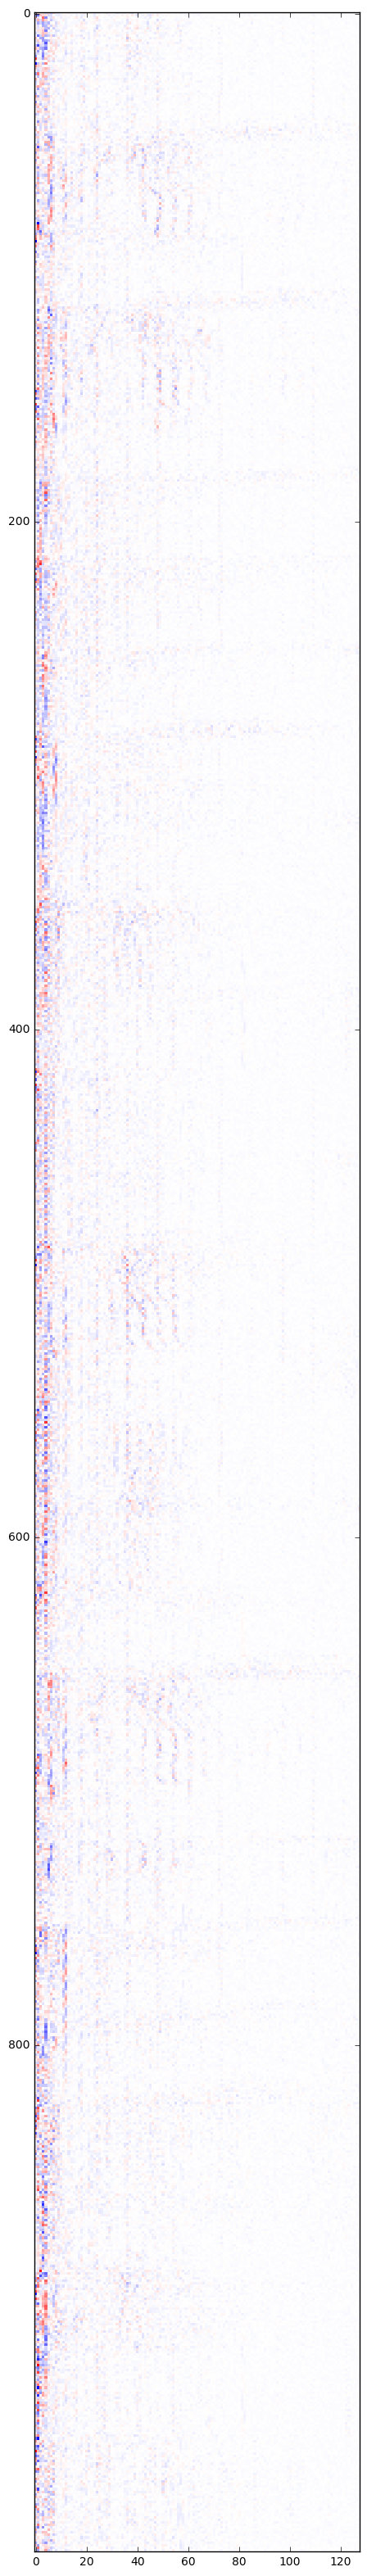

In [11]:
plt.figure(figsize=(40, 40))
plt.imshow(W[:, :128], interpolation='nearest', cmap=plt.get_cmap('bwr'))

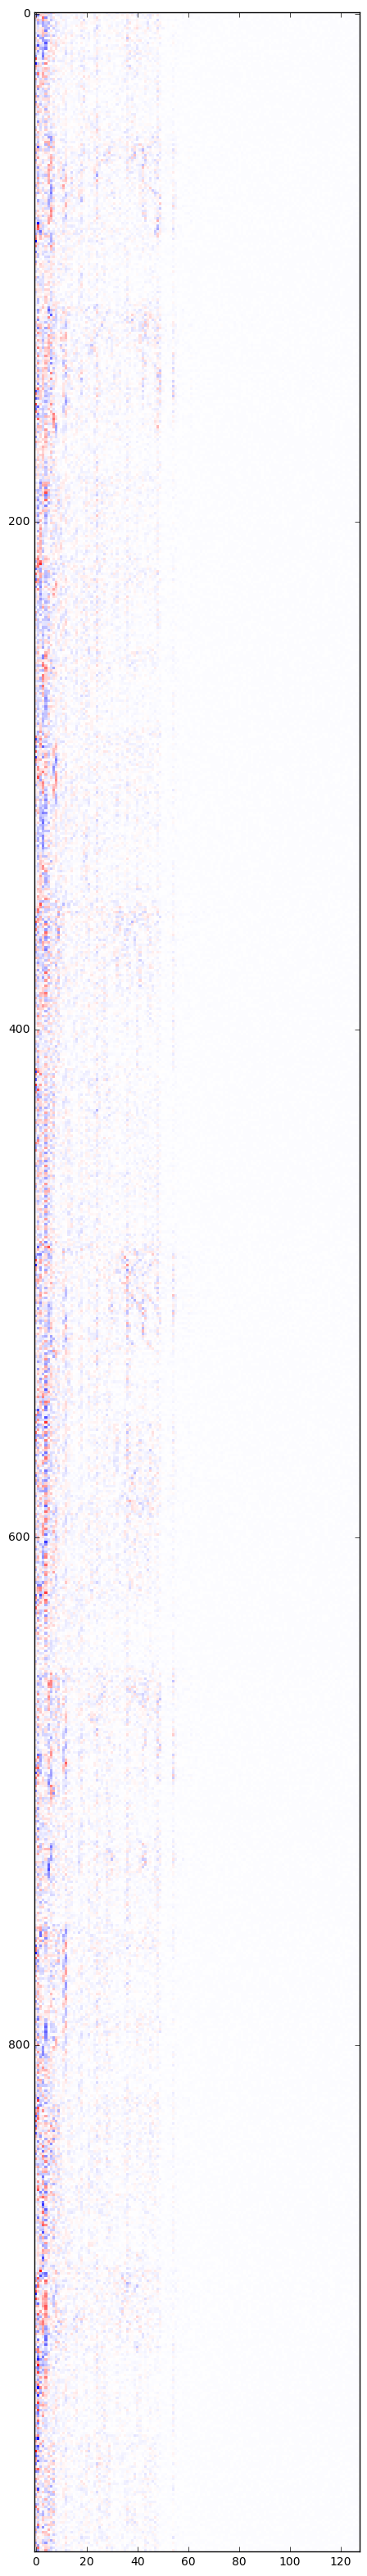

In [12]:
plt.figure(figsize=(40, 40))
plt.imshow(factorizer.transfer_approximated[:, :128], interpolation='nearest', cmap=plt.get_cmap('bwr'))

In [13]:
approximated_spec = np.array(factorizer.transfer_approximated)
# approximated_spec[:, :freq_lim] = W[:,:freq_lim]
# approximated_spec[:, freq_lim:] = 0
completed = 0.5 * mdct.imdct(approximated_spec.T, framelength=512)

In [14]:
wavfile.write('completed.wav', fs, completed.astype(np.int16))

In [15]:
not_completed = np.array(W)
not_completed[:, freq_lim:] = 0
compressed = 0.5 * mdct.imdct(not_completed.T, framelength=512)
wavfile.write('not_completed.wav', fs, compressed.astype(np.int16))

(1, 50, 256)


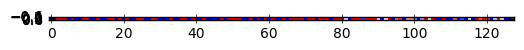

In [16]:
plt.imshow(factorizer.base.transpose(1,0,2)[17,:,:128], interpolation='nearest', cmap=plt.get_cmap('bwr'), clim=(-1000., +1000.))
print(factorizer.base.shape)